## あるエネルギー準位に対して、各dE

* ある１つの状態から生えている、dE=-n, -n+1, ..., -1, +1, +2, ...となる各エネルギー準位へのルート数の最大値はn個
(いずれかの電子をdEだけ動かす。１電子遷移を考えている)
* 遷移先の下準位の各電子について、dEだけ上に動いた先に電子が既に存在していれば、その電子を遷移させてE+dEの上準位からEの下準位に脱励起することはできない。
この割合見たいなんを求められたらいいなぁ

In [1]:
from fermi_model import *

In [2]:
def calc_score2route(states):
    # score2route: {エネルギー準位: {その他のエネルギー準位: 遷移可能なルート数}}
    score2route: dict[int, dict[int, int]] = dict()
    for i in range(len(states)):
        for j in range(len(states)):
            if Fermi.is_connected(states[i], states[j]):
                if not score2route.get(states[i].score):
                    score2route[states[i].score] = {states[j].score: 1}
                elif not score2route[states[i].score].get(states[j].score):
                    score2route[states[i].score][states[j].score] = 1
                else:
                    score2route[states[i].score][states[j].score] += 1
    return score2route

def calc_upper_score2route(states):
    # upper_score2route: {遷移前の上準位のエネルギー準位: {遷移先の下準位のエネルギー準位: 遷移可能なルート数}}
    upper_score2route: dict[int, dict[int, int]] = dict()
    for i in reversed(range(len(states))):
        for j in range(0, i):
            if Fermi.is_connected(states[i], states[j]):
                if not upper_score2route.get(states[i].score):
                    upper_score2route[states[i].score] = {states[j].score: 1}
                elif not upper_score2route[states[i].score].get(states[j].score):
                    upper_score2route[states[i].score][states[j].score] = 1
                else:
                    upper_score2route[states[i].score][states[j].score] += 1
    return upper_score2route

def calc_degeneracies(states: list[State]):
    """実際の縮退度を計算"""
    dct = {}
    for state in states:
        if dct.get(state.score):
            dct[state.score] += 1
        else:
            dct[state.score] = 1
    degeneracies = np.fromiter(dct.values(), dtype=int)
    return degeneracies

In [3]:
states3 = csv_to_states_from_filename()

In [4]:
score2route = calc_score2route(states3)
upper_score2route = calc_upper_score2route(states3)
degeneracies = calc_degeneracies(states3)

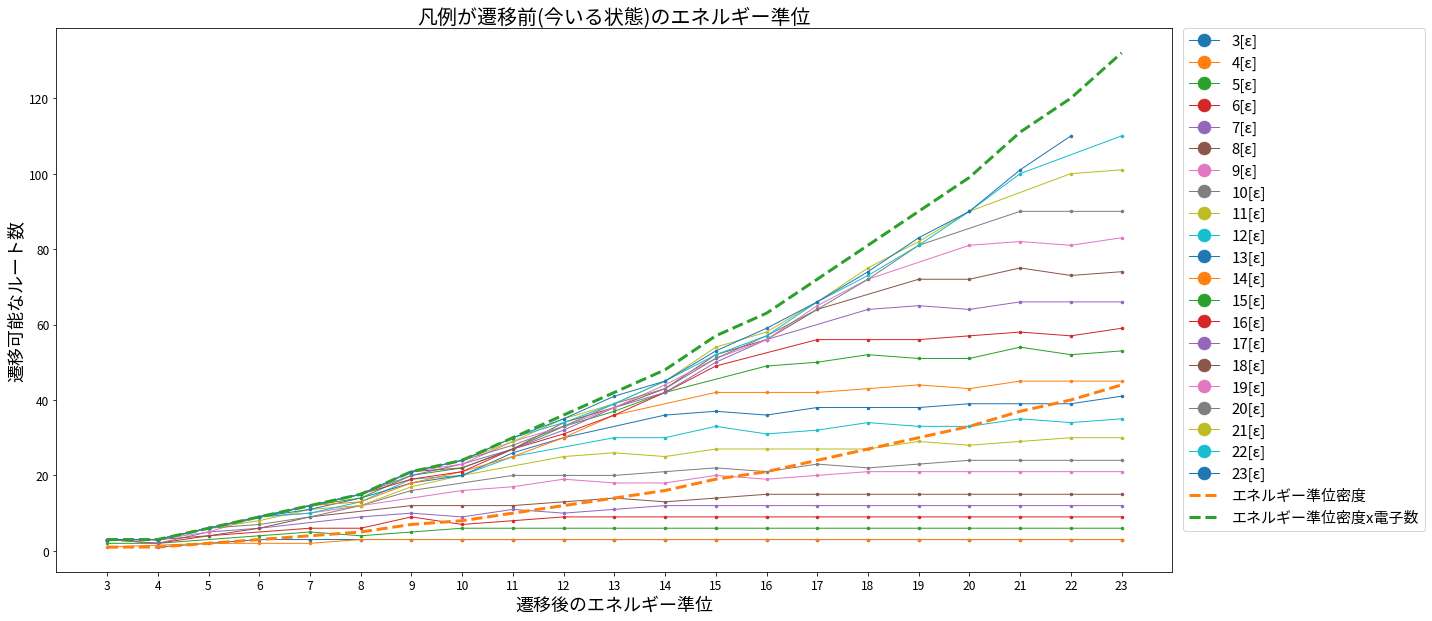

In [6]:
plt.figure(figsize=(20, 10))
plt.xticks(Fermi.get_scores(states3))
for score, level2route_num in score2route.items():
    plt.plot(level2route_num.keys(), level2route_num.values(), '.-', ms=5, linewidth=1, label=f"{score}[ε]")
plt.plot(Fermi.get_scores(states3), degeneracies, '--', linewidth=3, label="エネルギー準位密度")
plt.plot(Fermi.get_scores(states3), 3 * degeneracies, '--', linewidth=3, label="エネルギー準位密度x電子数")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize=15, ncol=1, markerscale=5)
plt.title("凡例が遷移前(今いる状態)のエネルギー準位", fontsize=20)
plt.xlabel("遷移後のエネルギー準位", fontsize=18)
plt.ylabel("遷移可能なルート数", fontsize=18)
# plt.yscale("log")
plt.show()

In [16]:
# scores3 = Fermi.get_scores(states3)
# min_score = min(scores3)
# plt.figure(figsize=(20, 10))
# plt.xticks(scores3)
# for score, level2route_num in score2route.items():
#     levels = np.fromiter(level2route_num.keys(), dtype='int8')
#     route_nums = np.fromiter(level2route_num.values(), dtype='int8')
#     route_rates = route_nums / np.array([elem for i, elem in enumerate(degeneracies) if i != score - min_score])
#     plt.plot(levels, route_rates, '.-', ms=5, linewidth=1, label=f"{score}[ε]")
# # plt.plot(Fermi.get_scores(states3), degeneracies, '--', linewidth=3, label="エネルギー準位密度")
# # plt.plot(Fermi.get_scores(states3), 3 * degeneracies, '--', linewidth=3, label="エネルギー準位密度x電子数")
# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize=15, ncol=1, markerscale=5)
# plt.title("凡例が遷移前(今いる状態)のエネルギー準位", fontsize=20)
# plt.xlabel("遷移後のエネルギー準位", fontsize=18)
# plt.ylabel("遷移可能なルート数 / 遷移後のエネルギー準位の数", fontsize=18)
# # plt.yscale("log")
# plt.show()

In [10]:
for score, level2route_num in score2route.items():
    print(np.fromiter(level2route_num.values(), dtype='int8'))


[1 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[1 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[2 2 4 5 4 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[3 2 4 6 6 9 7 8 9 9 9 9 9 9 9 9 9 9 9 9]
[ 3  2  5  6  9 10  9 11 10 11 12 12 12 12 12 12 12 12 12 12]
[ 3  3  4  6  9 12 12 12 13 14 13 14 15 15 15 15 15 15 15 15]
[ 3  3  5  9 10 12 16 17 19 18 18 20 19 20 21 21 21 21 21 21]
[ 3  3  6  7  9 12 16 20 20 20 21 22 21 23 22 23 24 24 24 24]
[ 3  3  6  8 11 12 17 20 25 26 25 27 27 27 27 29 28 29 30 30]
[ 3  3  6  9 10 13 19 20 25 30 30 33 31 32 34 33 33 35 34 35]
[ 3  3  6  9 11 14 18 20 26 30 36 37 36 38 38 38 39 39 39 41]
[ 3  3  6  9 12 13 18 21 25 30 36 42 42 42 43 44 43 45 45 45]
[ 3  3  6  9 12 14 20 22 27 33 37 42 49 50 52 51 51 54 52 53]
[ 3  3  6  9 12 15 19 21 27 31 36 42 49 56 56 56 57 58 57 59]
[ 3  3  6  9 12 15 20 23 27 32 38 42 50 56 64 65 64 66 66 66]
[ 3  3  6  9 12 15 21 22 27 34 38 43 52 56 64 72 72 75 73 74]
[ 3  3  6  9 12 15 21 23 29 33 38 44 51 56 65 72 81 82 81 83]
[ 3  3  6  9 12 15 21 24 2

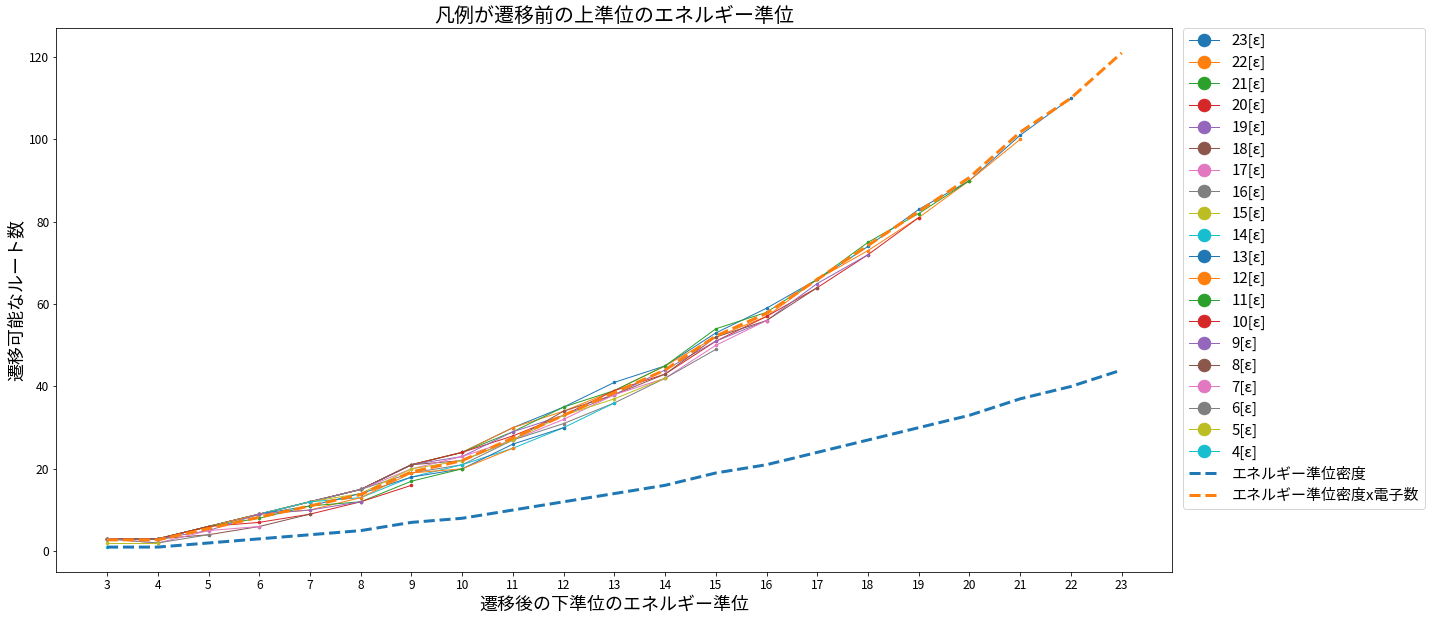

In [7]:
plt.figure(figsize=(20, 10))
plt.xticks(Fermi.get_scores(states3))
for score, level2route_num in upper_score2route.items():
    level_and_route_num = sorted(list(level2route_num.items()), key=lambda k_v: k_v[0])
    xs = [elem[0] for elem in level_and_route_num]
    ys = [elem[1] for elem in level_and_route_num]
    plt.plot(xs, ys, '.-', ms=5, linewidth=1, label=f"{score}[ε]")
plt.plot(Fermi.get_scores(states3), degeneracies, '--', linewidth=3, label="エネルギー準位密度")
plt.plot(Fermi.get_scores(states3), 2.75 * degeneracies, '--', linewidth=3, label="エネルギー準位密度x電子数")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize=15, ncol=1, markerscale=5)
plt.title("凡例が遷移前の上準位のエネルギー準位", fontsize=20)
plt.xlabel("遷移後の下準位のエネルギー準位", fontsize=18)
plt.ylabel("遷移可能なルート数", fontsize=18)
# plt.yscale("log")
plt.show()

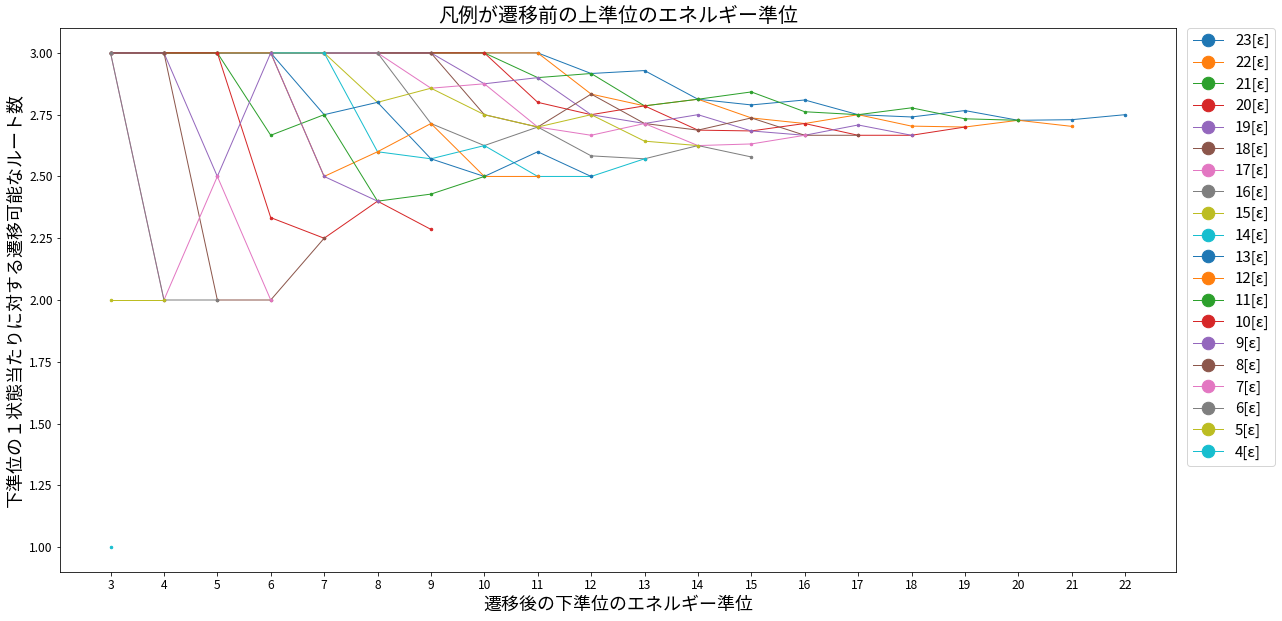

In [8]:
plt.figure(figsize=(20, 10))
plt.xticks(Fermi.get_scores(states3))

for score, level2route_num in upper_score2route.items():
    level_and_route_num = sorted(list(level2route_num.items()), key=lambda k_v: k_v[0])
    xs = [elem[0] for elem in level_and_route_num]
    ys = np.array([elem[1] for elem in level_and_route_num])
    ys = ys / np.array(degeneracies[:len(ys)])
    plt.plot(xs, ys, '.-', ms=5, linewidth=1, label=f"{score}[ε]")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize=15, ncol=1, markerscale=5)
plt.title("凡例が遷移前の上準位のエネルギー準位", fontsize=20)
plt.xlabel("遷移後の下準位のエネルギー準位", fontsize=18)
plt.ylabel("下準位の１状態当たりに対する遷移可能なルート数", fontsize=18)
# plt.yscale("log")
plt.show()

In [9]:
states48 = csv_to_states_from_filename('states48.csv')
upper_score2route = calc_upper_score2route(states48)
degeneracies = calc_degeneracies(states48)

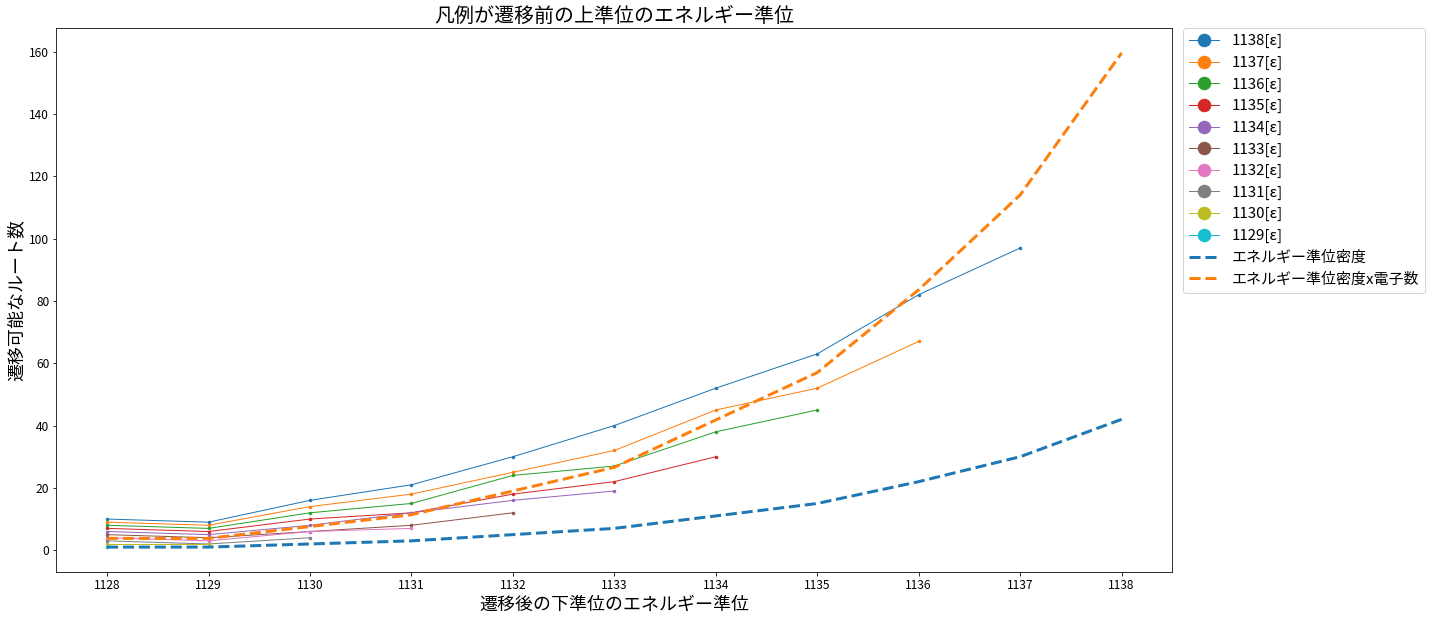

In [10]:
plt.figure(figsize=(20, 10))
plt.xticks(Fermi.get_scores(states48))

for score, level2route_num in upper_score2route.items():
    level_and_route_num = sorted(list(level2route_num.items()), key=lambda k_v: k_v[0])
    xs = [elem[0] for elem in level_and_route_num]
    ys = [elem[1] for elem in level_and_route_num]
    plt.plot(xs, ys, '.-', ms=5, linewidth=1, label=f"{score}[ε]")
plt.plot(Fermi.get_scores(states48), degeneracies, '--', linewidth=3, label="エネルギー準位密度")
plt.plot(Fermi.get_scores(states48), 3.8 * degeneracies, '--', linewidth=3, label="エネルギー準位密度x電子数")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize=15, ncol=1, markerscale=5)
plt.title("凡例が遷移前の上準位のエネルギー準位", fontsize=20)
plt.xlabel("遷移後の下準位のエネルギー準位", fontsize=18)
plt.ylabel("遷移可能なルート数", fontsize=18)
# plt.yscale("log")
plt.show()

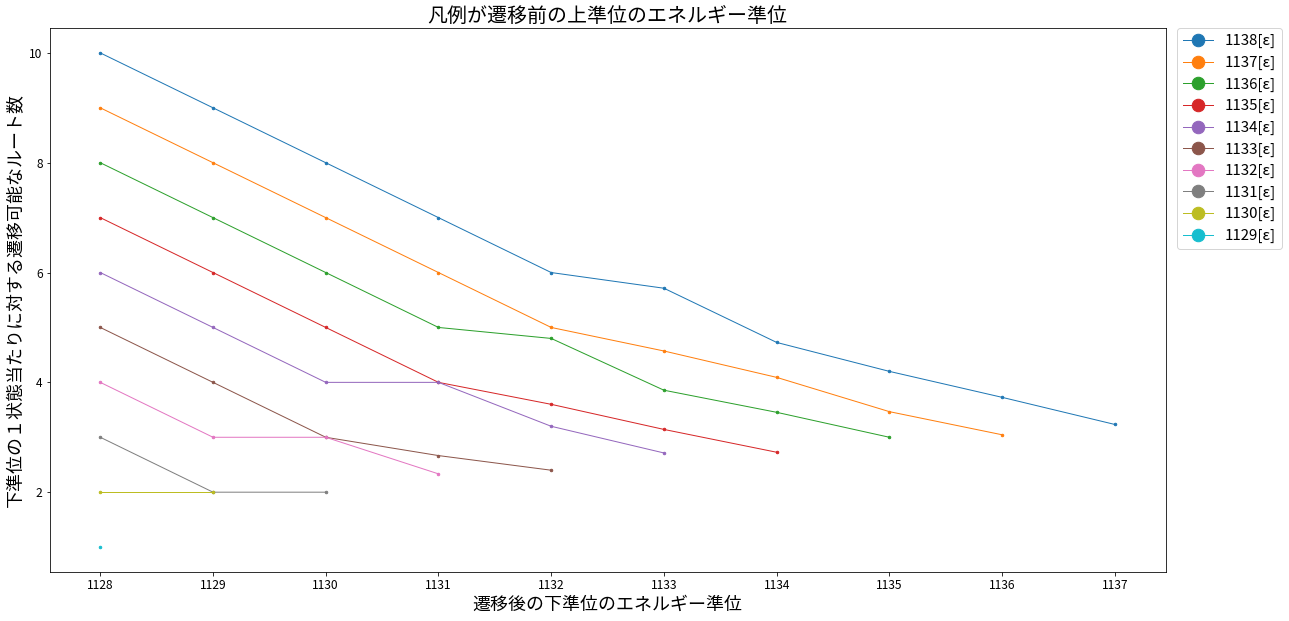

In [11]:
plt.figure(figsize=(20, 10))
plt.xticks(Fermi.get_scores(states48))

for score, level2route_num in upper_score2route.items():
    level_and_route_num = sorted(list(level2route_num.items()), key=lambda k_v: k_v[0])
    xs = [elem[0] for elem in level_and_route_num]
    ys = np.array([elem[1] for elem in level_and_route_num])
    ys = ys / np.array(degeneracies[:len(ys)])
    plt.plot(xs, ys, '.-', ms=5, linewidth=1, label=f"{score}[ε]")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize=15, ncol=1, markerscale=5)
plt.title("凡例が遷移前の上準位のエネルギー準位", fontsize=20)
plt.xlabel("遷移後の下準位のエネルギー準位", fontsize=18)
plt.ylabel("下準位の１状態当たりに対する遷移可能なルート数", fontsize=18)
# plt.yscale("log")s
plt.show()

## ルート数を遷移先のエネルギー準位密度で割ることによって、上準位からある下準位１状態あたり何個脱励起可能なルートがあるか、つまり、下準位の１状態あたり何個励起可能なルートがあるか

In [12]:
states5 = csv_to_states_from_filename('states5.csv')
upper_score2route = calc_upper_score2route(states5)
degeneracies = calc_degeneracies(states5)

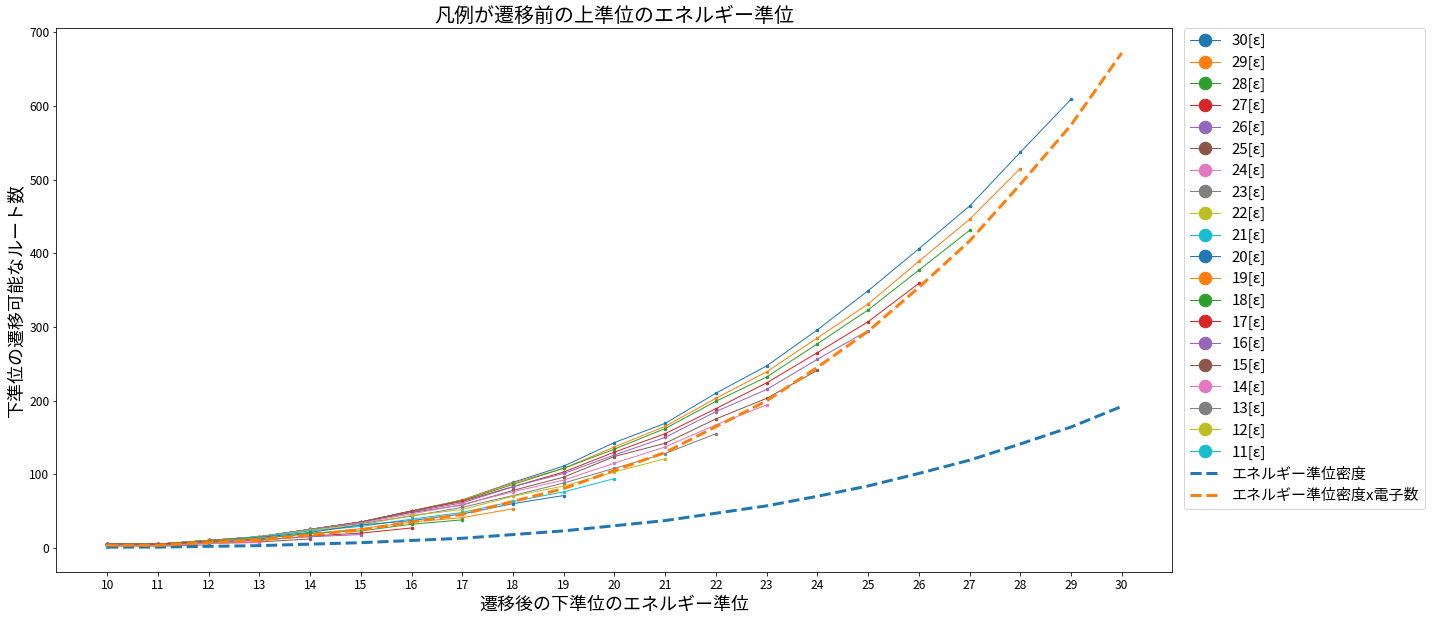

In [16]:
plt.figure(figsize=(20, 10))
plt.xticks(Fermi.get_scores(states5))

for score, level2route_num in upper_score2route.items():
    level_and_route_num = sorted(list(level2route_num.items()), key=lambda k_v: k_v[0])
    xs = [elem[0] for elem in level_and_route_num]
    ys = np.array([elem[1] for elem in level_and_route_num])
    plt.plot(xs, ys, '.-', ms=5, linewidth=1, label=f"{score}[ε]")
plt.plot(Fermi.get_scores(states5), degeneracies, '--', linewidth=3, label="エネルギー準位密度")
plt.plot(Fermi.get_scores(states5), 3.5 * degeneracies, '--', linewidth=3, label="エネルギー準位密度x電子数")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize=15, ncol=1, markerscale=5)
plt.title("凡例が遷移前の上準位のエネルギー準位", fontsize=20)
plt.xlabel("遷移後の下準位のエネルギー準位", fontsize=18)
plt.ylabel("下準位の遷移可能なルート数", fontsize=18)
# plt.yscale("log")
plt.show()

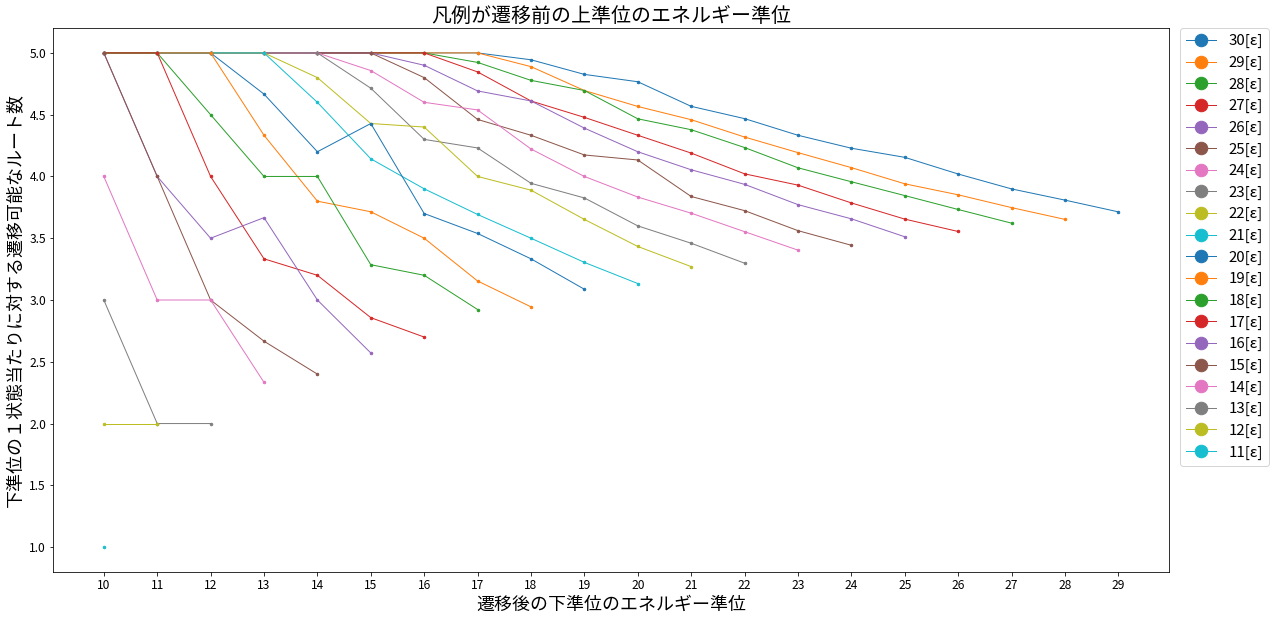

In [14]:
plt.figure(figsize=(20, 10))
plt.xticks(Fermi.get_scores(states5))

for score, level2route_num in upper_score2route.items():
    level_and_route_num = sorted(list(level2route_num.items()), key=lambda k_v: k_v[0])
    xs = [elem[0] for elem in level_and_route_num]
    ys = np.array([elem[1] for elem in level_and_route_num])
    ys = ys / np.array(degeneracies[:len(ys)])
    plt.plot(xs, ys, '.-', ms=5, linewidth=1, label=f"{score}[ε]")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize=15, ncol=1, markerscale=5)
plt.title("凡例が遷移前の上準位のエネルギー準位", fontsize=20)
plt.xlabel("遷移後の下準位のエネルギー準位", fontsize=18)
plt.ylabel("下準位の１状態当たりに対する遷移可能なルート数", fontsize=18)
# plt.yscale("log")
plt.show()

In [17]:
from numpy import e

In [18]:
e**0.5 - e**(-0.5)

1.0421906109874948